<a href="https://colab.research.google.com/github/anushkagup208/ml-projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# import pandas as pd
# import nltk
# # !pip install vaderSentiment
# # import nltk
# # nltk.sentiment.vader.SentimentIntensityAnalyser
# import re
# from textblob import TextBlob
# from wordcloud import WordCloud
# import seaborn as sns
# import matplotlib.pyplot as plt
# import cufflinks as cf
# %matplotlib inline
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")
# pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('/content/twitter_sentiment.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.columns=['a','b','Sentiment','text']
df=df.drop(['a','b'],axis=1)

In [ ]:
df.dropna(inplace=True)
df = df[df['text'].apply(len)>1]

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-am9mll_o
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-am9mll_o
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=a10f7f1030005319b46479df1df3854be7c3bb13483cf98b6e2ee606835e73e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-73jt289i/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps



In [ ]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [ ]:
df=ps.get_basic_features(df)
df.columns

Index(['Sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

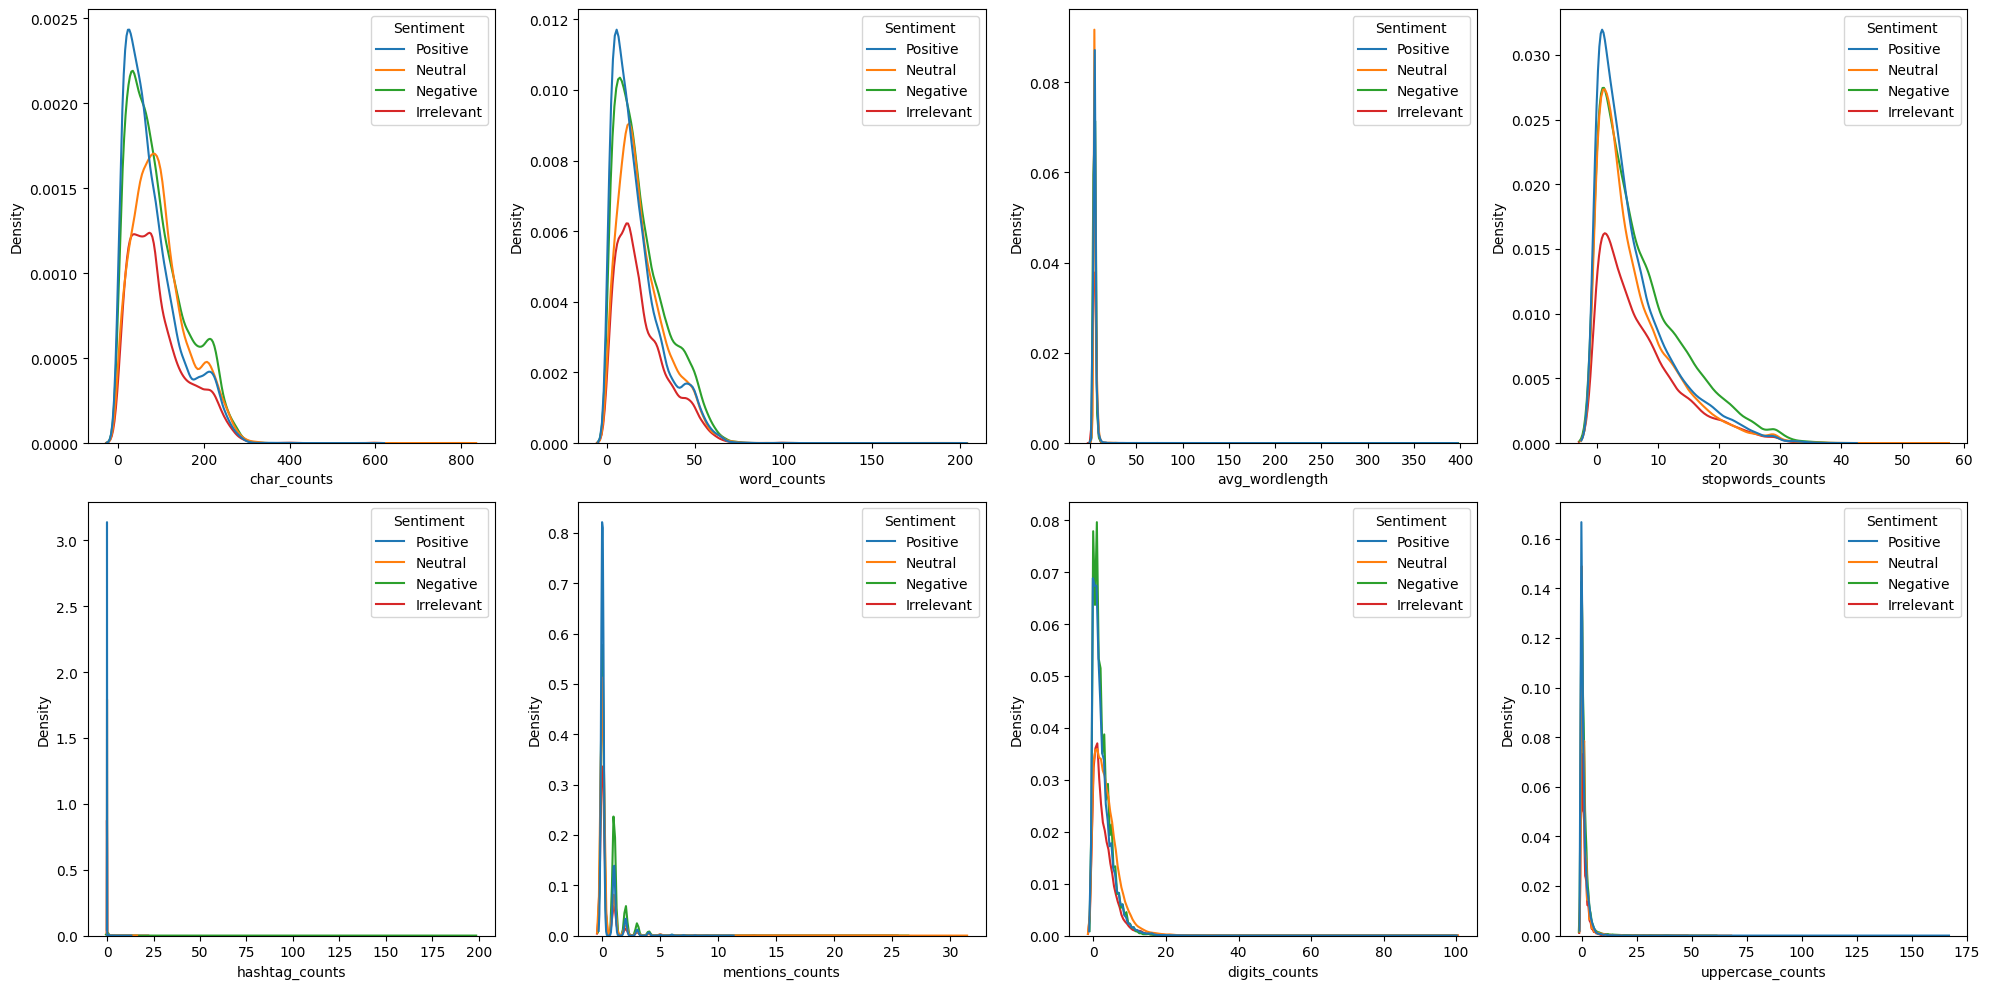

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns
num_cols
for index,col in enumerate(num_cols):
  plt.subplot(2,4,index+1)
  #kernel density estimation plot
  sns.kdeplot(data=df,x=col,hue='Sentiment')#hue changes the colour wrt to sentiment
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

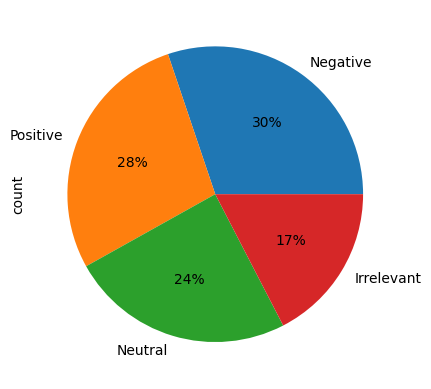

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [ ]:
#wordcloud
!pip install WordCloud


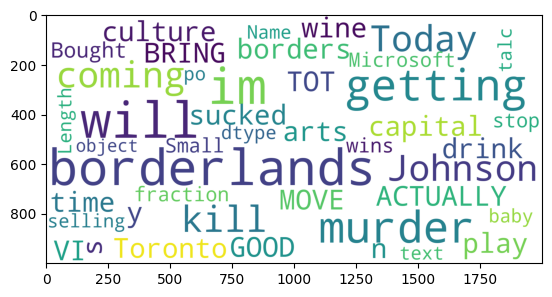

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

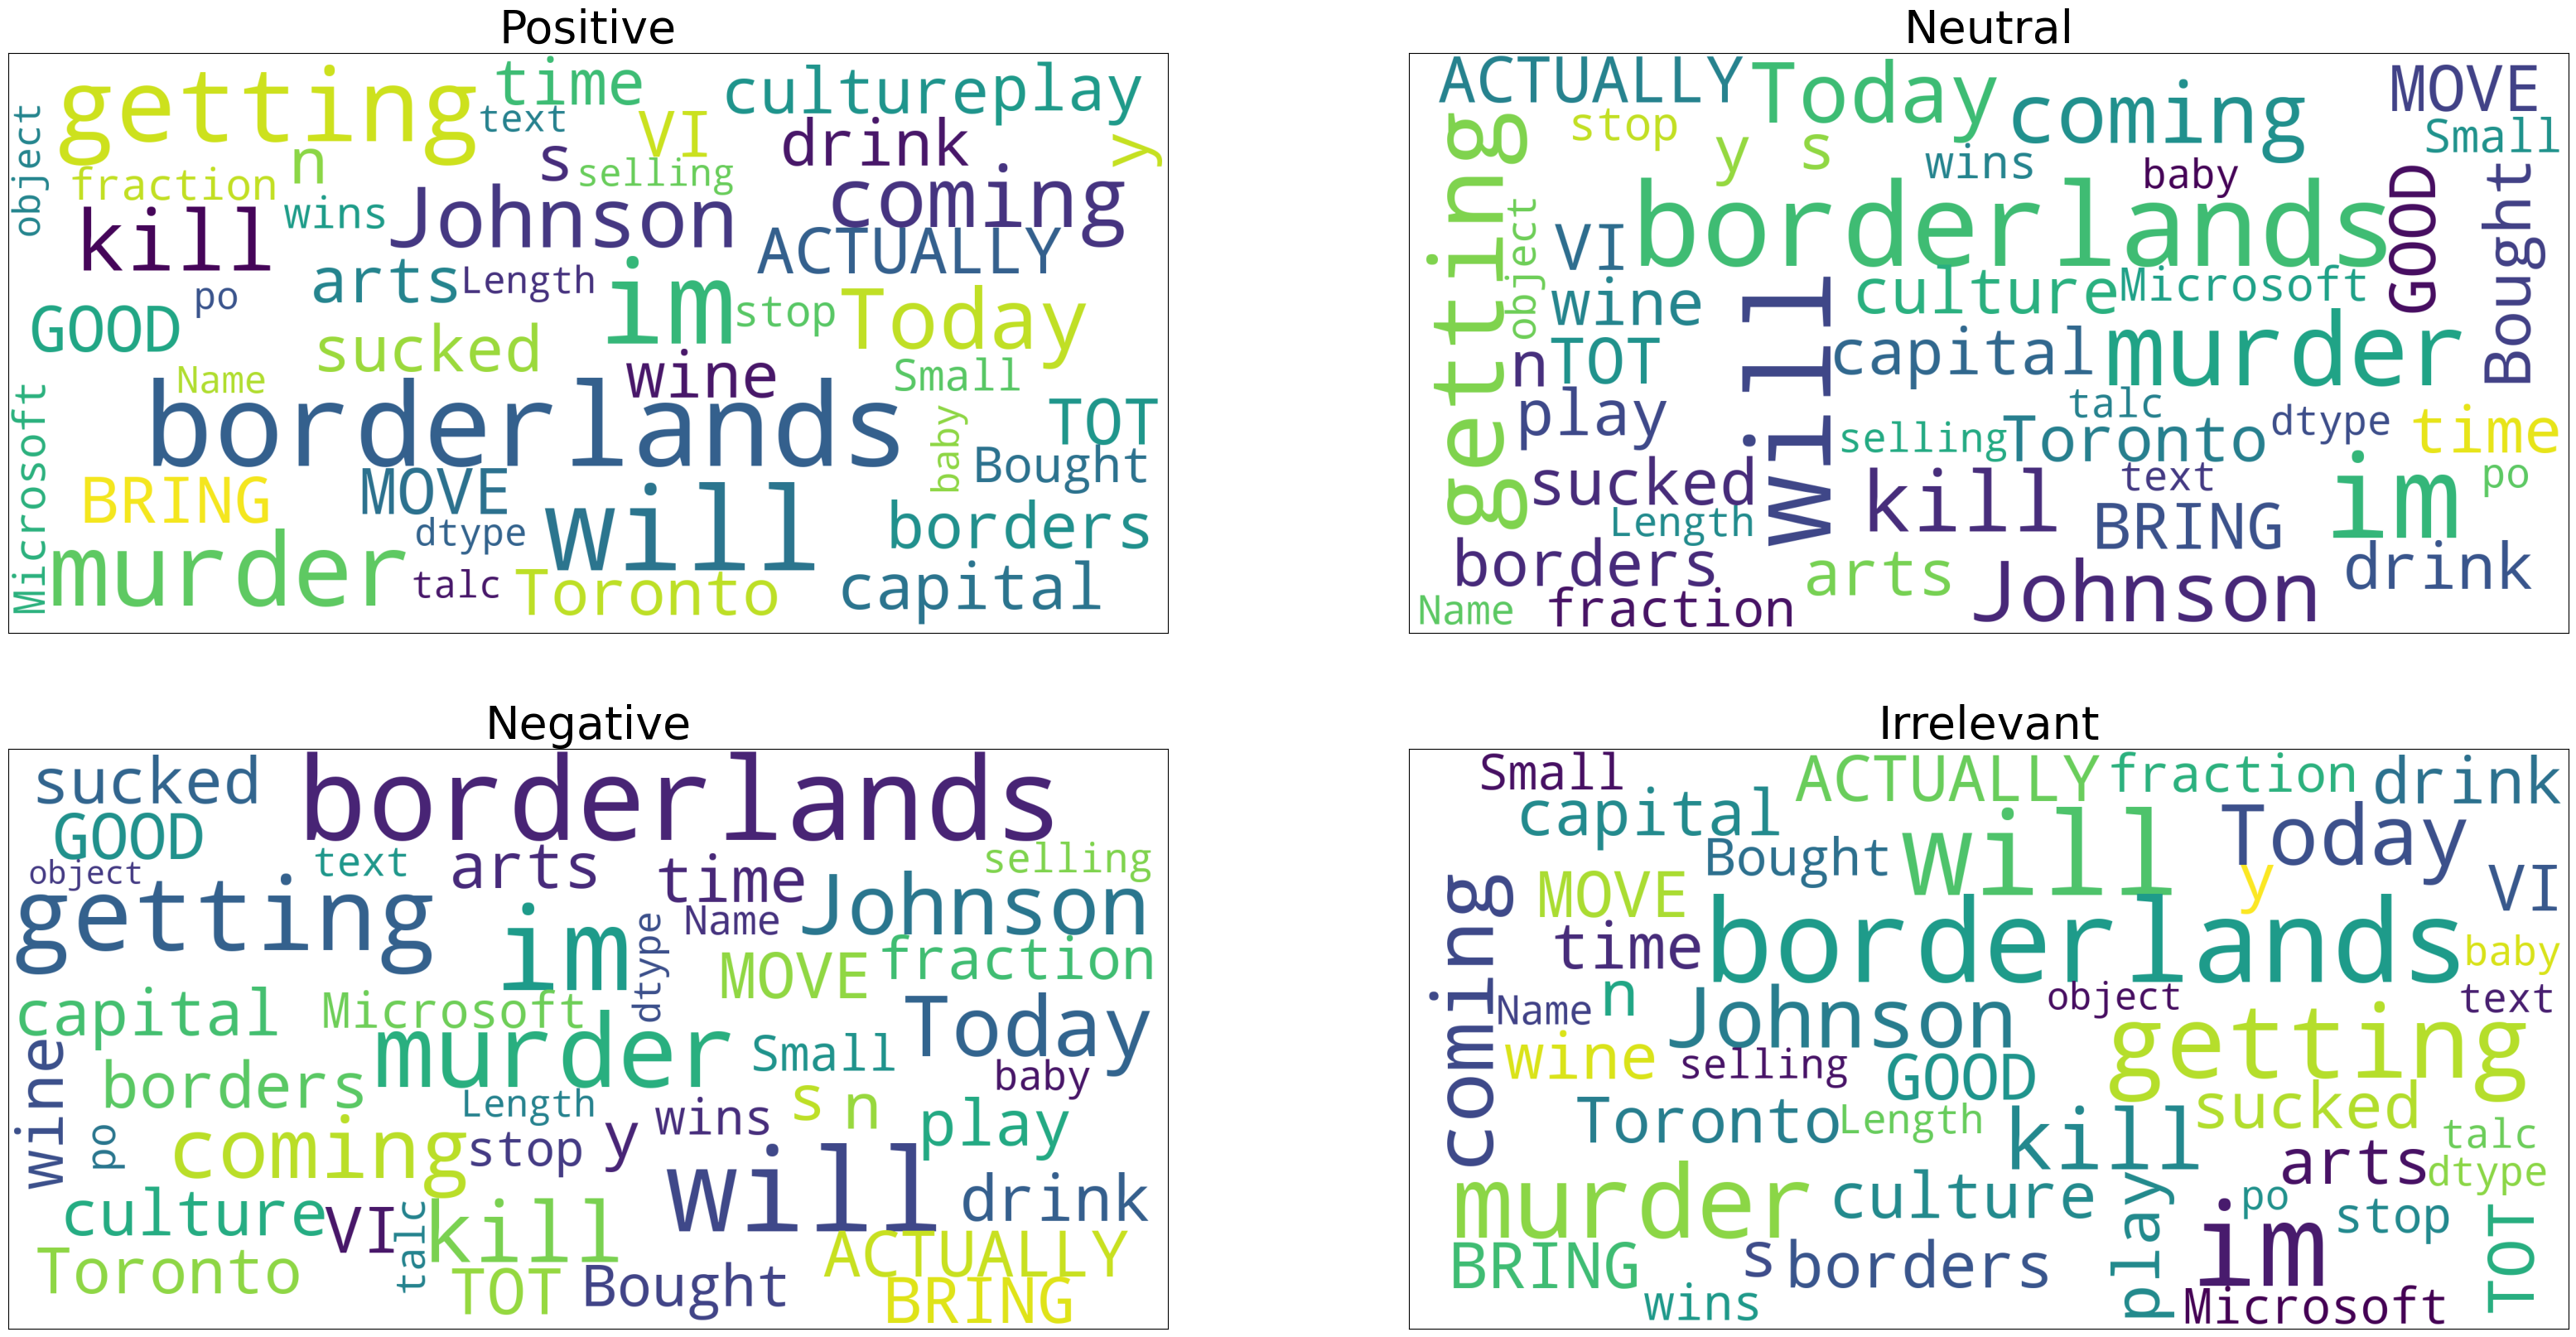

In [ ]:
plt.figure(figsize=(40,20))
for index,sent in enumerate(df['Sentiment'].unique()):
  plt.subplot(2,2,index+1)
  data=df[df['Sentiment']==sent]['text']
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(df['text']))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  # plt.imshow(wordcloud)
  plt.title(sent, fontsize=40)




In [ ]:
#DataCleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((59716,), (14930,))

In [ ]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
#evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9168117883456128


In [ ]:
import pickle
pickle.dump(clf,open("twitter_sentiment.pkl",'wb'))
clf.predict([''])